# 1. Read Clean Data. 

## import các thư viện cần thiết

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Đọc dữ liệu đã được sử lí. 

In [3]:
cleaned_data_folder = './Processed Data'

In [4]:
# lấy ra danh sach các file trong thư mục
files = os.listdir(cleaned_data_folder)

print(files)

['UK_Accident_Processed_4.csv', 'UK_Accident_Processed_1.csv', 'UK_Accident_Processed_6.csv', 'UK_Accident_Processed_3.csv', 'UK_Accident_Processed_9.csv', 'UK_Accident_Processed_5.csv', 'UK_Accident_Processed_7.csv', 'UK_Accident_Processed_8.csv', 'UK_Accident_Processed_0.csv', 'UK_Accident_Processed_2.csv']


In [5]:
cleaned_df = pd.DataFrame()

for file in files:
    # đọc file csv
    data = pd.read_csv(cleaned_data_folder + '/' + file)
    # thêm cột 'filename' chứa tên file
    data['filename'] = file
    # thêm dữ liệu vào result
    cleaned_df = pd.concat([cleaned_df, data])

In [6]:
cleaned_df.head(10)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,filename
0,200905EE03198,337560.0,394070.0,-2.941460,53.439681,5,3,1,1,04/12/2009,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Wet/Damp,NaN,1,No,E01006616,2009,UK_Accident_Processed_4.csv
1,200905EE03201,335770.0,390990.0,-2.967774,53.411784,5,3,2,1,06/12/2009,...,non-junction pedestrian crossing,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,1,Yes,E01006650,2009,UK_Accident_Processed_4.csv
2,200905EE03202,333870.0,391600.0,-2.996482,53.417031,5,3,3,1,24/11/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,1,Yes,E01006776,2009,UK_Accident_Processed_4.csv
3,200905EE03208,335580.0,393930.0,-2.971235,53.438184,5,2,1,1,04/12/2009,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,NaN,1,Yes,E01006700,2009,UK_Accident_Processed_4.csv
4,200905EE03211,335550.0,393900.0,-2.971680,53.437911,5,3,2,1,05/12/2009,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Raining with high winds,Wet/Damp,NaN,1,No,E01006700,2009,UK_Accident_Processed_4.csv
5,200905EE03214,338470.0,392140.0,-2.927385,53.422442,5,3,2,1,16/11/2009,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Other,Wet/Damp,NaN,1,Yes,E01006761,2009,UK_Accident_Processed_4.csv
6,200905EE03222,337860.0,392290.0,-2.936593,53.423718,5,3,1,1,04/12/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,1,No,E01006760,2009,UK_Accident_Processed_4.csv
7,200905EE03224,334230.0,389630.0,-2.990655,53.399371,5,3,1,1,15/11/2009,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Unknown,Dry,NaN,1,No,E01006517,2009,UK_Accident_Processed_4.csv
8,200905EE03225,338990.0,390490.0,-2.919242,53.407673,5,2,1,2,02/12/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Frost/Ice,NaN,1,Yes,E01006716,2009,UK_Accident_Processed_4.csv
9,200905EE03228,336150.0,395570.0,-2.962989,53.452993,5,3,3,1,07/12/2009,...,non-junction pedestrian crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,1,Yes,E01006791,2009,UK_Accident_Processed_4.csv


# 2. Ask Meaningful Question 

**Question:** Tai nạn giao thông ở Anh có xu hướng thay đổi như thế nào qua các năm, và có các ngày hoặc giờ cụ thể nào trong tuần dễ xảy ra tai nạn hơn không? Các điều kiện ngoại cảnh ảnh hưởng như thế nào đến sự phân bố tai nạn như thế nào? 


**There is a benefit gained after answering this question:**

### 1. chuẩn bị dữ liệu 

In [7]:
import datetime as dt

In [8]:
df = cleaned_df.copy()


In [9]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', infer_datetime_format=True)
df['Date'].unique()

array(['2009-04-12T00:00:00.000000000', '2009-06-12T00:00:00.000000000',
                                 'NaT', ...,
       '2014-09-06T00:00:00.000000000', '2014-07-08T00:00:00.000000000',
       '2014-01-09T00:00:00.000000000'], dtype='datetime64[ns]')

In [10]:
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "morning rush (5-10)"
    elif hour >= 10 and hour < 15:
        return "office hours (10-15)"
    elif hour >= 15 and hour < 19:
        return "afternoon rush (15-19)"
    elif hour >= 19 and hour < 23:
        return "evening (19-23)"
    else:
        return "night (23-5)"


df['Hour'] = df['Time'].str[0:2]

#cast to numeric
df['Hour'] = pd.to_numeric(df['Hour'])

# set the null value to 0
df['Hour'] = df['Hour'].fillna(0)

#cast to inter value to remove leading zeros
df['Hour'] = df['Hour'].astype(int)

#apply the funtion to our temporary hour column 
df['Daytime'] = df['Hour'].apply(when_was_it)

df[['Time', 'Hour', 'Daytime']].head(10)

,Time,Hour,Daytime
0,12:55,12,office hours (10-15)
1,22:00,22,evening (19-23)
2,13:45,13,office hours (10-15)
3,20:45,20,evening (19-23)
4,01:23,1,night (23-5)
5,17:25,17,afternoon rush (15-19)
6,14:00,14,office hours (10-15)
7,03:00,3,night (23-5)
8,15:30,15,afternoon rush (15-19)
9,08:30,8,morning rush (5-10)


### 2. Phân tích xu hướng tai nạn theo năm. 

In [11]:
accidents_by_year = df.groupby('Year')['Accident_Index'].count()

all_years = pd.Series(range(accidents_by_year.index.min(), accidents_by_year.index.max() + 1))

print(all_years)
print(accidents_by_year)

0    2005
1    2006
2    2007
3    2008
4    2009
5    2010
6    2011
7    2012
8    2013
9    2014
dtype: int64
Year
2005    198735
2006    189161
2007    182115
2009    163554
2010    154414
2011    151474
2012    179715
2013    138660
2014    146322
Name: Accident_Index, dtype: int64


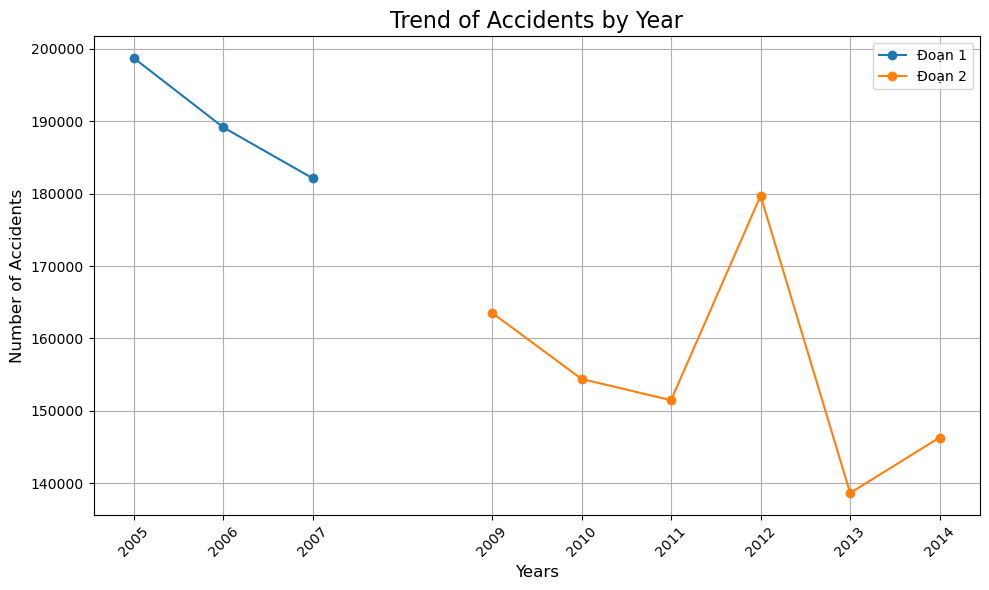

In [12]:
groups = []
current_group = []

for i, year in enumerate(accidents_by_year.index):
    if i == 0 or year == accidents_by_year.index[i - 1] + 1:
        current_group.append((year, accidents_by_year[year]))
    else:
        groups.append(current_group)
        current_group = [(year, accidents_by_year[year])]

if current_group:
    groups.append(current_group)

# Vẽ từng đoạn (trong trường hợp này chỉ có 1 đoạn liên tục)
plt.figure(figsize=(10, 6))

for group in groups:
    years, values = zip(*group)
    plt.plot(
        years, values, marker='o', linestyle='-', label=f'Đoạn {groups.index(group) + 1}'
    )

# Thêm thông tin vào biểu đồ
plt.title('Trend of Accidents by Year', fontsize=16)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(accidents_by_year.index, rotation=45)  # Hiển thị các năm
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Nhận xét:**
1. Đoạn một. 
- Số vụ tai nạn giảm đáng kể từ năm 2005 đến 2007. 
- Đây có thể là dấu hiệu của những cải thiện trong an toàn giao thông hoặc biện pháp giảm thiểu tai nạn hiệu quả trong giai đoạn này. 

2. Đoạn hai. 
- Số vụ tai nạn giao động khá lớn. 
- Biến động này có thể phản ánh các yếu tô thay đổi như điều kiện kinh tế hoặc tình hình thời tiết, ... 

3. Tổng quan. 
- Biểu đồ cung cấp cái nhìn tốt về xu hướng thay đổi tai nạn qua thời gian. Đặc biệt là sự cải thiện từ giai đoạn đầu (2005 - 2007).
- Mặc dù tại giai đoạn hai có biến động, tuy nhiên trên tổng thể thì ta có thể thấy xu hướng tai nạn đã giảm đáng kể qua các năm. Qua đó cũng cho thấy khả năng cải thiện đáng kể về các biện pháp an toàn giao thông. 


### 3. Phân tích tai nạn theo từng ngày trong tuần.

In [13]:
accidents_by_day_of_week = df.groupby('Day_of_Week')['Accident_Index'].count()
accidents_by_day_of_week

Day_of_Week
1    164972
2    213748
3    224110
4    226359
5    226411
6    247137
7    201413
Name: Accident_Index, dtype: int64

In [14]:
day_of_week = {
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday'
}

accidents_by_day_of_week.index = accidents_by_day_of_week.index.map(day_of_week)
accidents_by_day_of_week

Day_of_Week
Sunday       164972
Monday       213748
Tuesday      224110
Wednesday    226359
Thursday     226411
Friday       247137
Saturday     201413
Name: Accident_Index, dtype: int64

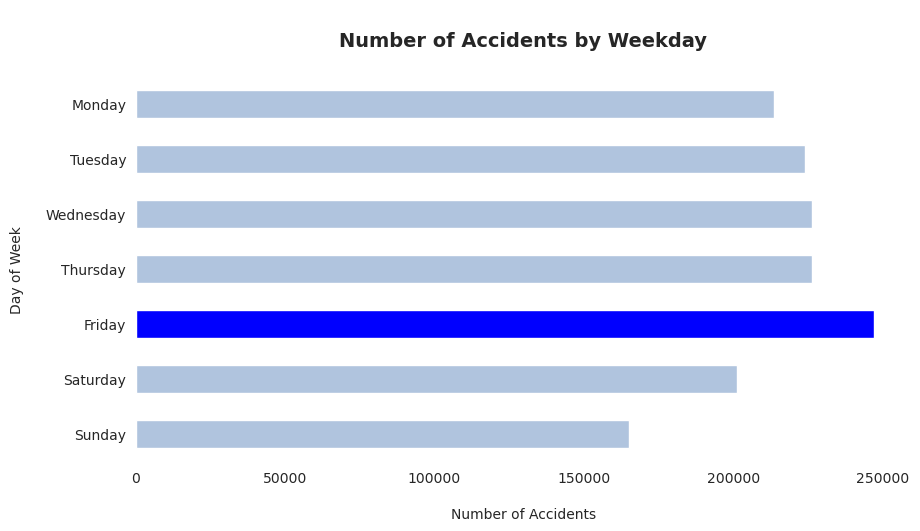

In [15]:
# vẽ biểu đồ 

# Định nghĩa danh sách các ngày
days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']

# Thiết lập kiểu và kích thước của biểu đồ
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10, 5))

# Màu sắc cho từng cột
colors = ['lightsteelblue', 'lightsteelblue', 'blue', 'lightsteelblue', 
          'lightsteelblue', 'lightsteelblue', 'lightsteelblue']

# Vẽ biểu đồ ngang
accidents_by_day_of_week.reindex(days).plot(kind='barh', ax=ax, color=colors)

# Tiêu đề và nhãn trục
ax.set_title('\nNumber of Accidents by Weekday\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nNumber of Accidents', ylabel='Day of Week\n')

# Loại bỏ các viền ngoài không cần thiết
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)

# Hiển thị biểu đồ
plt.show()

**Nhận xét:** 
- Số bụ tai nạn cao nhất xảy ra vào `thứ sáu` với số lượng nổi bật so với các ngày khác, được biểu diễn bằng màu xanh đậm. 
- Các ngày còn lại trong tuần có số vụ tai nạn tương đối đồng đều, với số lượng giảm dần vào cuối tuần (Thứ bảy và Chủ nhật). 

**Kết luận**
- Nguyên nhân xảy ra tại nạn nhiều vào `Thứ sáu` có thể là do lưu lượng giao thông cao nhất do nhiều người kết thúc các công việc dài này và trở về nhà vào cuối tuần hoặc tham gia các hoặt động cuối tuần. Áp lực thời gian hoặc các hành vi lái xe vội vàng có thể là nguyên nhân góp phần làm tăng số vụ tai nạn. 
- Cuối tuần (đặc biệt Chủ Nhật) có ít tại nạn hơn, có thể do lưu lượng giao thông giảm do có ít người di chuyển (mọi người thường dành thời gian cuối tuấn cho gia đình của mình).  

In [16]:
# Getting weekday and year
weekday = df['Day_of_Week'].map(day_of_week)
year    = df['Date'].dt.year

# Grouping data by year and weekday
accident_table = df.groupby([year, weekday]).size()


accident_table = accident_table.rename_axis(['Year', 'Weekday'])\
                               .unstack('Weekday')\
                               .reindex(columns=days)

accident_table.fillna(0, inplace=True)
accident_table = accident_table.astype(int)
accident_table

Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday
Year,,,,,,,
2005.0,8391,11073,12989,11143,11747,11997,10440
2006.0,9004,10708,12358,11253,11728,10574,10513
2007.0,8263,9552,11309,11013,10565,10217,10948
2009.0,7077,8524,10381,10526,10242,10104,9318
2010.0,6355,7818,10479,9166,8756,8892,9276
2011.0,6667,8320,10397,9128,8832,9498,8596
2012.0,7989,9150,10516,10958,10777,10186,9957
2013.0,5957,7015,9297,8232,8146,8974,8202
2014.0,6086,7971,9462,8525,9376,9246,8403


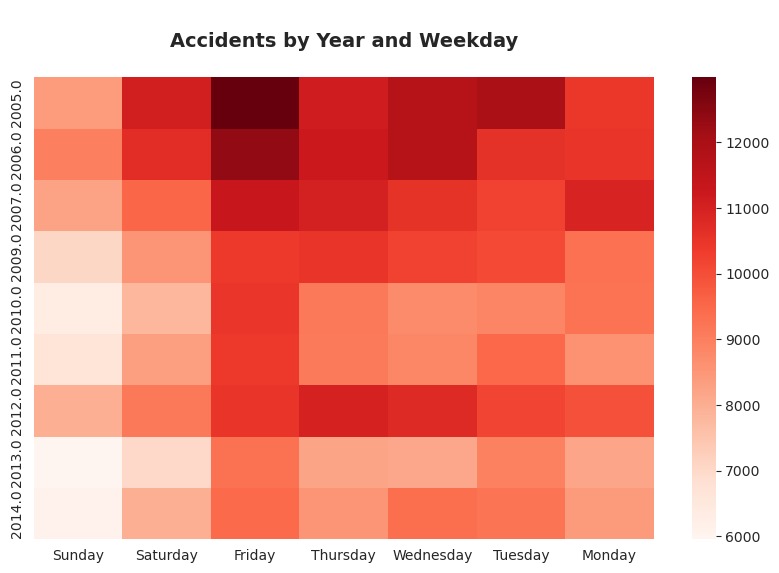

In [17]:
# Plotting dataframe
plt.figure(figsize=(10,6))
sns.heatmap(accident_table, cmap='Reds')
plt.title('\nAccidents by Year and Weekday\n', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('');

**Nhận xét:**
- Màu sắc đạm nhất (đỏ thẫm): cho thấy sô vụ tai nạn cao nhất vào `Thứ Sáu`, trong xuyên suốt nhiều năm.  
- Các ngày `Thứ Hai`, `Thứ Ba`, `Thứ Tư` và `Thứ Năm` có số lượng tai nạn tương đối đều nhau nhưng màu sắc nhạt hơn. 
- `Thứ Bảy` và `Chủ Nhật` có số vụ tai nạn thấp hơn đáng kể so với các ngày trong tuần, **Điều này tạo nên sự nhất quán đối với biểu đồ thức nhất**. 
- Xu hướng giảm dần tai nạn từ năm 2005 đến 2014: số vụ tai nạn trong các năm gần đây (2014) trở nên ít hơn so với các năm trước rất nhiều. 

**Kết luận:**
- Xu hường giảm tai nạn qua thời gian cho thấy các biện pháp an toàn giao thông hoặc sự cải thiện trong hạ tầng giao thông đã phát huy hiệu quả.  
- Tuy nhiên, ngày `Thứ Sáu` vẫn là ngày cần được chú trọng trong các chiến dịch an toàn giao thông do đây là ngày xảy ra tai nạn nhiều nhất.  
- Cuối tuần ít tai nạn hơn, một phần do người tham gia giao thông ít hơn và tốc độ di chuyển thấp hơn. 

### 4. Phân tích tai nạn từ các khoảng thời gian trong ngày. 

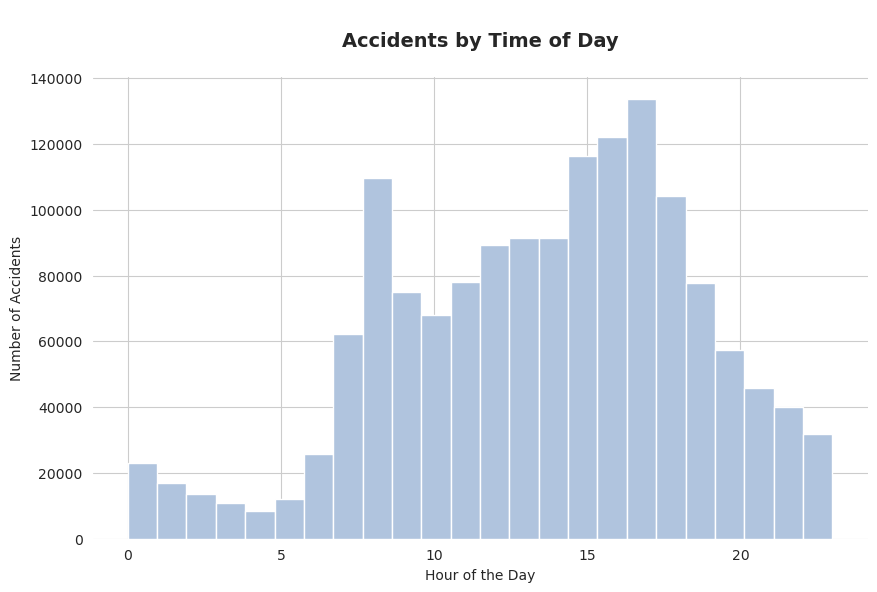

In [18]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,6))

# plot
df.Hour.hist(bins=24, ax=ax, color='lightsteelblue')
ax.set_title('\nAccidents by Time of Day\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Hour of the Day', ylabel='Number of Accidents')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

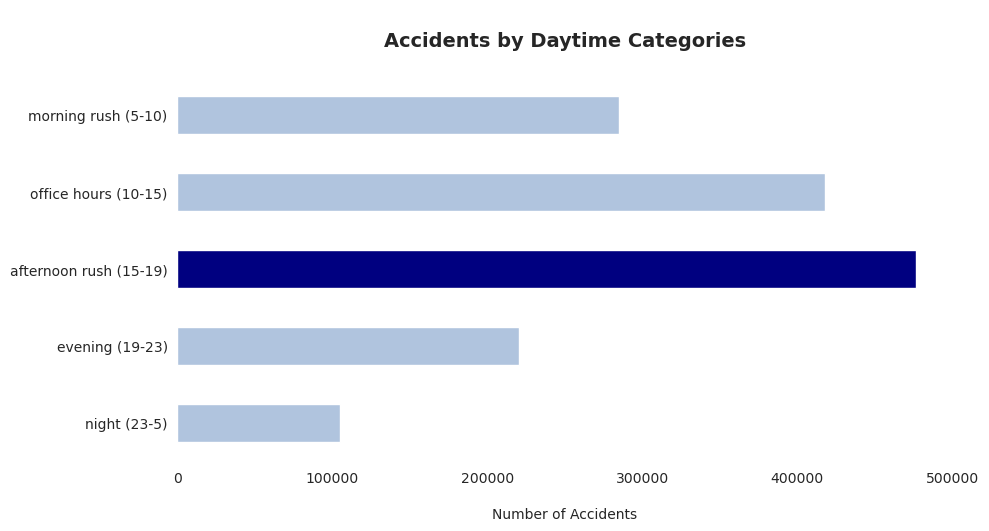

In [19]:
# prepare dataframe
order = ['night (23-5)', 'evening (19-23)', 'afternoon rush (15-19)', 'office hours (10-15)', 'morning rush (5-10)']
df_sub = df.groupby('Daytime').size().reindex(order)

# prepare barplot
fig, ax = plt.subplots(figsize=(10, 5))
colors = ['lightsteelblue', 'lightsteelblue', 'navy', 'lightsteelblue', 'lightsteelblue']

# plot
df_sub.plot(kind='barh', ax=ax, color=colors)
ax.set_title('\nAccidents by Daytime Categories\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nNumber of Accidents', ylabel='')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

#### Nhận xét biểu đồ

##### Biểu đồ 1: **Accidents by Time of Day**
- **Xu hướng tổng quát**: 
  Số vụ tai nạn có xu hướng tăng dần từ sáng sớm, đạt đỉnh vào khoảng **15:00 - 16:00**, sau đó giảm dần vào buổi tối.
- **Thời gian thấp nhất**: 
  Số vụ tai nạn thấp nhất vào khoảng **3:00 - 5:00**, khi hầu hết mọi người đang ngủ hoặc giao thông thưa thớt.
- **Thời gian cao nhất**: 
  Giao thông nguy hiểm nhất là vào giờ cao điểm buổi chiều (**15:00 - 18:00**), có thể do mật độ giao thông tăng lên khi mọi người tan sở hoặc đi học về.

##### Biểu đồ 2: **Accidents by Daytime Categories**
- **Phân loại giờ trong ngày**:
  1. **Morning rush (5-10)**: Có số lượng tai nạn cao, nhưng thấp hơn giờ cao điểm buổi chiều.
  2. **Office hours (10-15)**: Tai nạn tiếp tục tăng dần, với nhiều người tham gia giao thông.
  3. **Afternoon rush (15-19)**: Đây là khung giờ nguy hiểm nhất, chiếm số lượng tai nạn cao nhất trong ngày.
  4. **Evening (19-23)**: Tai nạn giảm, nhưng vẫn ở mức đáng kể do lượng xe cộ vào giờ tối.
  5. **Night (23-5)**: Tai nạn ở mức thấp nhất, do giao thông thưa thớt.

---

#### Kết luận

1. **Chủ quan**:
   - Những giờ cao điểm, đặc biệt buổi chiều, là thời điểm dễ xảy ra tai nạn nhất. Nguyên nhân có thể bao gồm:
     - Tâm lý vội vã về nhà sau giờ làm việc.
     - Tắc đường làm tăng nguy cơ va chạm.
     - Mệt mỏi hoặc thiếu tập trung sau một ngày dài.

2. **Khách quan**:
   - Tai nạn thường tập trung vào các khung giờ mật độ giao thông cao. 
   - Điều này cho thấy cần tăng cường các biện pháp an toàn giao thông vào giờ cao điểm, đặc biệt vào buổi chiều (**15:00 - 19:00**).
   - Các biện pháp như:
     - Cải thiện cơ sở hạ tầng giao thông.
     - Tăng cường cảnh sát tuần tra vào giờ cao điểm.
     - Tuyên truyền giáo dục ý thức lái xe.
   - Những biện pháp này có thể giúp giảm thiểu tai nạn giao thông.

### 5. Vấn đề ngày thứ sáu.

# Data Modeling